In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD', '2015-01-01', '2023-11-30')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = pd.DataFrame(data)

In [5]:
data.reset_index(inplace = True)

In [9]:
data.drop(columns = {'Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'}, inplace = True)

In [10]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3250,37796.792969
3251,37479.121094
3252,37254.167969
3253,37831.085938


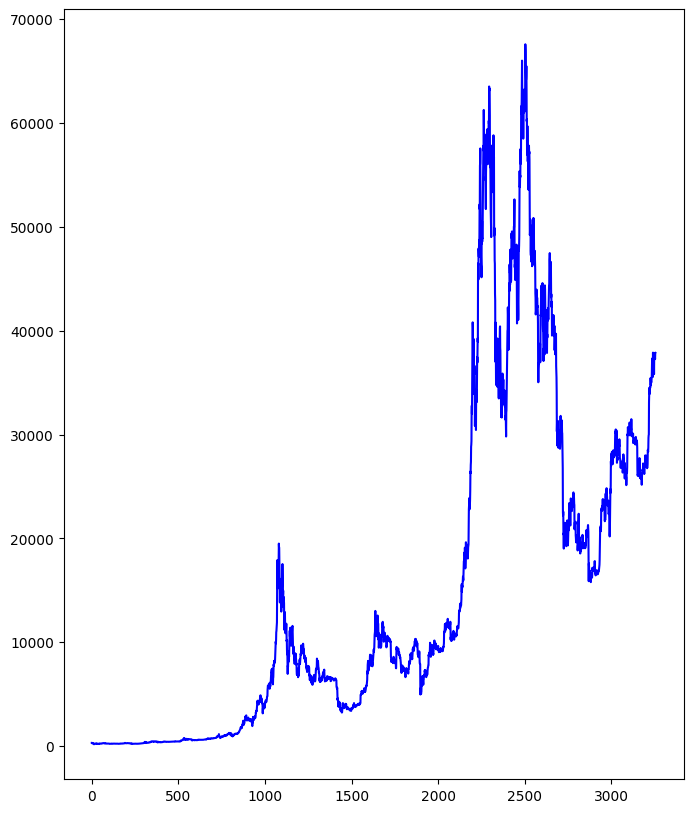

In [11]:
plt.figure(figsize=(8,10))
plt.plot(data, 'b')
plt.show()

In [12]:
train_data = data[:-100]
test_data = data[-100:]

In [13]:
train_data.shape()

TypeError: 'tuple' object is not callable

In [14]:
train_data.shape

(3155, 1)

In [15]:
test_data.shape

(100, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_data_scale = scaler.fit_transform(train_data)

In [18]:
base_days = 100

In [20]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [21]:
x[0]

array([[0.00202031],
       [0.00203193],
       [0.00152813],
       [0.00127754],
       [0.00143008],
       [0.00160392],
       [0.00172483],
       [0.00156177],
       [0.00166652],
       [0.00143485],
       [0.00129928],
       [0.00133098],
       [0.00070869],
       [0.        ],
       [0.00047101],
       [0.00044509],
       [0.00031395],
       [0.00047836],
       [0.00054546],
       [0.00049284],
       [0.00072407],
       [0.00082066],
       [0.00081284],
       [0.00103495],
       [0.00112207],
       [0.00141522],
       [0.00126686],
       [0.00082821],
       [0.00082224],
       [0.00071706],
       [0.00058409],
       [0.00072518],
       [0.00089223],
       [0.00072957],
       [0.00072341],
       [0.00057885],
       [0.00065535],
       [0.00073678],
       [0.00067235],
       [0.00062335],
       [0.00061933],
       [0.00060963],
       [0.0006479 ],
       [0.00085065],
       [0.00117554],
       [0.00084171],
       [0.00082714],
       [0.000

In [22]:
y[0]

0.0008673410131410366

In [23]:
x, y  = np.array(x), np.array(y)

In [24]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [25]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, 
               input_shape = (x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [28]:
 model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x, y, epochs = 1, verbose = 1)

96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - loss: 0.0459


In [31]:
test_data

,Close
3155,26031.656250
3156,26431.640625
3157,26162.373047
3158,26047.667969
3159,26008.462891
...,...
3250,37796.792969
3251,37479.121094
3252,37254.167969
3253,37831.085938


In [32]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index = True)

In [35]:
test_data_scale = scaler.transform(test_data)

In [36]:
x = []
y = []
for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i, 0])

In [37]:
x[0]

array([[0.3969883 ],
       [0.40087701],
       [0.39856144],
       [0.40393552],
       [0.39552768],
       [0.39638717],
       [0.39994054],
       [0.39436453],
       [0.39581064],
       [0.40136719],
       [0.38814676],
       [0.39024487],
       [0.39385206],
       [0.39606404],
       [0.41412779],
       [0.40908597],
       [0.40843994],
       [0.40127714],
       [0.3953461 ],
       [0.40172131],
       [0.39913243],
       [0.39978444],
       [0.37961832],
       [0.40156095],
       [0.38831266],
       [0.39071987],
       [0.39030672],
       [0.38097081],
       [0.38229043],
       [0.38173147],
       [0.38197229],
       [0.37018912],
       [0.3768923 ],
       [0.38803761],
       [0.39075636],
       [0.38816745],
       [0.39580696],
       [0.41771654],
       [0.44294047],
       [0.44123373],
       [0.45285566],
       [0.45067765],
       [0.44966215],
       [0.44655879],
       [0.45274727],
       [0.44381524],
       [0.4491441 ],
       [0.449

In [38]:
x, y = np.array(x), np.array(y)

In [39]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [40]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


In [41]:
pred

array([[0.4283866 ],
       [0.42733526],
       [0.42608556],
       [0.4246562 ],
       [0.42307135],
       [0.4213589 ],
       [0.4195504 ],
       [0.41767862],
       [0.4158005 ],
       [0.41397017],
       [0.41221318],
       [0.41053802],
       [0.40894496],
       [0.40743238],
       [0.40599513],
       [0.4046274 ],
       [0.40332338],
       [0.40208596],
       [0.4009162 ],
       [0.39981425],
       [0.39877892],
       [0.39779803],
       [0.39686722],
       [0.39599147],
       [0.39518395],
       [0.3944594 ],
       [0.39382926],
       [0.39330035],
       [0.3928779 ],
       [0.39257056],
       [0.3923835 ],
       [0.39230925],
       [0.39233404],
       [0.39244092],
       [0.39260763],
       [0.392812  ],
       [0.39303324],
       [0.39325553],
       [0.39347714],
       [0.39370066],
       [0.39393088],
       [0.39418742],
       [0.3944855 ],
       [0.3948337 ],
       [0.39524066],
       [0.39570564],
       [0.39623046],
       [0.396

In [42]:
pred = scaler.inverse_transform(pred)

In [43]:
pred

array([[29046.531],
       [28975.682],
       [28891.467],
       [28795.145],
       [28688.344],
       [28572.943],
       [28451.07 ],
       [28324.934],
       [28198.37 ],
       [28075.025],
       [27956.625],
       [27843.736],
       [27736.383],
       [27634.451],
       [27537.598],
       [27445.43 ],
       [27357.553],
       [27274.164],
       [27195.334],
       [27121.076],
       [27051.307],
       [26985.205],
       [26922.479],
       [26863.465],
       [26809.047],
       [26760.219],
       [26717.756],
       [26682.113],
       [26653.645],
       [26632.934],
       [26620.326],
       [26615.324],
       [26616.994],
       [26624.197],
       [26635.432],
       [26649.205],
       [26664.113],
       [26679.092],
       [26694.027],
       [26709.09 ],
       [26724.604],
       [26741.89 ],
       [26761.979],
       [26785.443],
       [26812.867],
       [26844.203],
       [26879.568],
       [26918.986],
       [26962.271],
       [27008.707],


In [44]:
#future Bitcoin Prediction

In [63]:
m = y
z = []
future_days = 10
for i in range(base_days, len(m) + future_days):
    m = m.reshape(-1, 1)
    inter = [m[-base_days:, 0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1], 1))
    pred = model.predict(inter)
    m = np.append(m, pred)
    z = np.append(z, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [64]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1, 1))

In [65]:
z

array([[34731.3926309 ],
       [34830.74925269],
       [34919.24878567],
       [34993.88273576],
       [35052.48611189],
       [35093.91415996],
       [35117.95801257],
       [35125.26033867],
       [35117.06630938],
       [35095.04686401]])

model.save('Bitcoin_Price_Prediction_Model.keras')